# Gender and Age Prediction training and testing

In [2]:
## imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [3]:
#Get required data from file names
path = "utkface_data/UTKFace"
images = []
age = []
gender = []
#race = []
for img in os.listdir(path):
    ages = img.split("_")[0]
    genders = img.split("_")[1]
    #races = img.split("_")[2]
    img = cv2.imread(str(path)+"/"+str(img))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))
    #race.append(np.array(races))

In [4]:
#Create the Testing and training datasets (race doesen't work due to issuies with some of the names)
age = np.array(age, dtype=np.int64)
images = np.array(images)
gender = np.array(gender,np.uint64)
#race = np.array(race,dtype=np.int64)

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

#x_train_race, x_test_race, y_train_race, y_test_race = train_test_split(images, race, random_state=42)


# Define Age Model and Train

In [9]:
age_model= Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

history_age = age_model.fit(x_train_age, y_train_age, validation_data=(x_test_age,y_test_age), epochs=50)

age_model.save('age_model_50epochs.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 22, 256)     

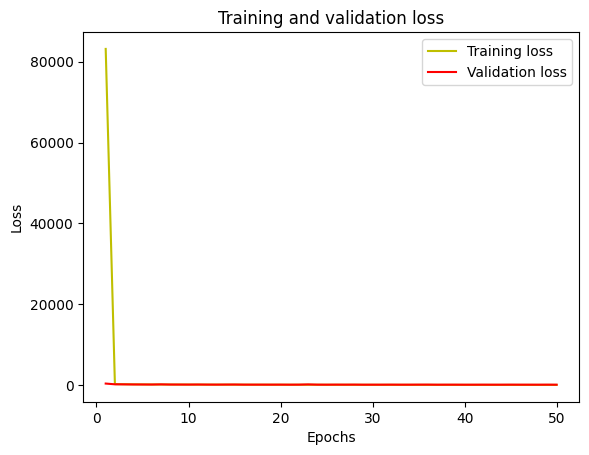

In [10]:
history = history_age

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

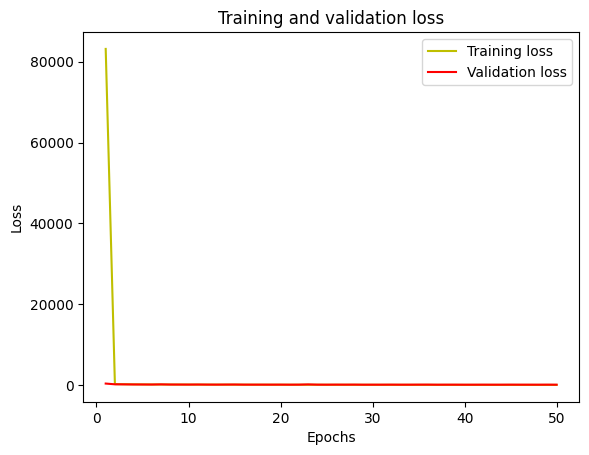

In [11]:
age_loss=history_age.history['loss']
age_val_loss=history_age.history['val_loss']
age_epochs = range(1, len(age_loss)+ 1)
plt.plot(age_epochs, age_loss, 'y', label='Training loss')
plt.plot(age_epochs, age_val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
age_acc = history_age.history['accuracy']
age_val_acc=history_age.history['val_accuracy']

KeyError: 'accuracy'

In [ ]:
plt.plot(age_epochs, age_acc, 'y', label='Training acc')
plt.plot(age_epochs, age_val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Define Gender Model and train

In [5]:
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

Epoch 1/50
556/556 [==============================] - 31s 40ms/step - loss: 0.9234 - accuracy: 0.6863 - val_loss: 0.6202 - val_accuracy: 0.6917
Epoch 2/50
556/556 [==============================] - 20s 37ms/step - loss: 0.4349 - accuracy: 0.7948 - val_loss: 0.4341 - val_accuracy: 0.7926
Epoch 3/50
556/556 [==============================] - 20s 36ms/step - loss: 0.4010 - accuracy: 0.8141 - val_loss: 0.4183 - val_accuracy: 0.8061
Epoch 4/50
556/556 [==============================] - 20s 36ms/step - loss: 0.3765 - accuracy: 0.8242 - val_loss: 0.3684 - val_accuracy: 0.8353
Epoch 5/50
556/556 [==============================] - 20s 36ms/step - loss: 0.3593 - accuracy: 0.8339 - val_loss: 0.3660 - val_accuracy: 0.8340
Epoch 6/50
556/556 [==============================] - 20s 36ms/step - loss: 0.3473 - accuracy: 0.8394 - val_loss: 0.4092 - val_accuracy: 0.8078
Epoch 7/50
556/556 [==============================] - 20s 36ms/step - loss: 0.3447 - accuracy: 0.8436 - val_loss: 0.3472 - val_accuracy:

In [ ]:
history = history_gender
#check the validation anf training loss over each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

In [ ]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test Age Model

In [1]:
from keras.models import load_model

my_model = load_model('age_model_50epochs.h5', compile=False)

In [6]:
prediction = my_model.predict(x_test_age)
y_pred= (prediction>= 0.5).astype(int)[:,0]

186/186 [==============================] - 13s 26ms/step


In [7]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test_age, y_pred))

Accuracy =  0.04217985490129914


<Axes: >

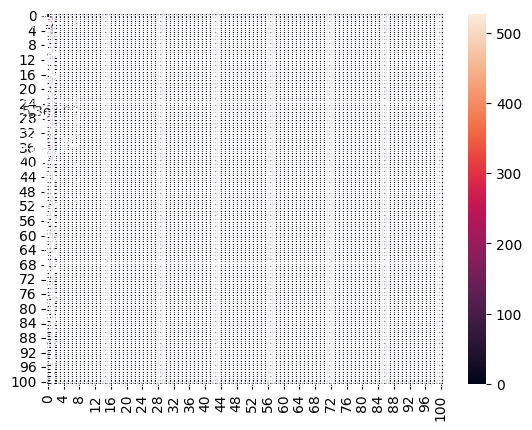

In [10]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_age, y_pred)  
sns.heatmap(cm, annot=True)

# Test Gender

In [11]:
my_model = load_model('gender_model_50epochs.h5', compile=False)

In [12]:
prediction = my_model.predict(x_test_gender)
y_pred= (prediction>= 0.5).astype(int)[:,0]

186/186 [==============================] - 1s 7ms/step


In [13]:
print("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

Accuracy =  0.8786907373038637


<Axes: >

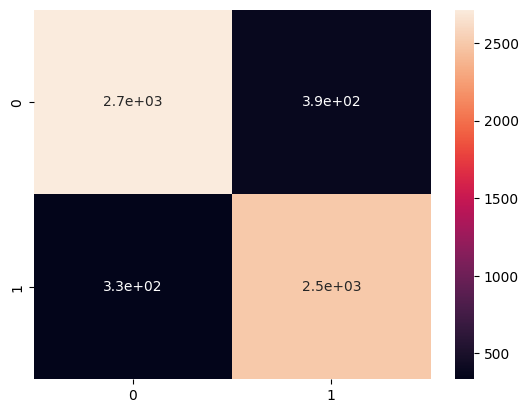

In [14]:
#Confusion Matrix - verify accuracy of each class
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)